In [15]:
"""
Purpose: To be able to error out certain axon
that are

1) Thin
2) have wide sibling angle
3) DO NOT HAVE A VALID WEBBING

Question: How to determine if something is valid webbing or not

Pseudocode: 
1) Find example of when there is a non-valid high branching angle without webbing
2) Measure the characteristics of the webbing
3) Write a restriction and see if only errors out that branch
-> do the same for other neurons if worked
"""

'\nPurpose: To be able to error out certain axon\nthat are\n\n1) Thin\n2) have wide sibling angle\n3) DO NOT HAVE A VALID WEBBING\n\nQuestion: How to determine if something is valid webbing or not\n\nPseudocode: \n1) Find example of when there is a non-valid high branching angle without webbing\n2) Measure the characteristics of the webbing\n3) Write a restriction and see if only errors out that branch\n-> do the same for other neurons if worked\n'

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-22 23:31:44,891 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-22 23:31:44,892 - settings - Setting database.user to celiib
INFO - 2021-04-22 23:31:44,893 - settings - Setting database.password to newceliipass
INFO - 2021-04-22 23:31:44,896 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-22 23:31:44,896 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-22 23:31:44,906 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-22 23:31:45,238 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-22 23:31:45,242 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-22 23:31:45,243 - settings - Setting database.user to celiib
INFO - 2021-04-22 23:31:45,244 - settings - Setting database.password to newceliipass
INFO - 2021-04-22 23:31:45,246 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-22 23:31:45,247 - settings - Setting database.user to celiib
INFO - 2021-04-22 23:31:45,248 - settings - Setting database.password to newceliipass
INFO - 2021-04-22 23:31:45,249 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-22 23:31:45,595 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-22 23:31:45,701 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-22 23:31:45,702 - settings - Setting database.user to celiib
INFO - 2021-04-22 23:31:45,702 - settings - Setting database.password to newceliipass
INFO - 2021-04-22 23:31:45,703 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-22 23:31:46,090 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru

In [5]:
"""
Neurons to try: 

864691136201041854


"""

'\nNeurons to try: \n\n864691136201041854\n\n\n'

# Downloading the Neuron

In [9]:
segment_id = 864691136201041854
minnie.Decomposition() & f"segment_id = {segment_id}"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691136201041854,0,0.25,30.00,7,0,1,=BLOB=,587695,1171068,0,0,0,0,1,10,120,55,5076852.519968285,2366255.207142101,37283.799,307.033,275.246,516.579,484.631,2233,0.00043983944603810345,18.608333333333334,4711527.557,105,0.0004739439540542201,21.267,556357196991.679,133389301.4617106,109587.0314931178,118084.2498023999,5298639971.349323,2272.7736


In [8]:
minnie.AutoProofreadValidationBorderNeurons() & f"segment_id={segment_id}"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),decomposition


In [11]:
neuron_objs,_ = du.decomposition_with_spine_recalculation(segment_id=segment_id)

Decompressing Neuron in minimal output mode...please wait
Pulled from Table Decomposition so setting split_index = 0
Dont need spine recalculation
Number of Neurons found = 1


In [12]:
neuron_obj = neuron_objs[0]

In [17]:
neuron_obj_orig = neuron_obj

In [13]:
nviz.visualize_neuron_lite(neuron_obj)


 Working on visualization type: mesh


In [14]:
import axon_utils as au
neuron_obj_axon = au.complete_axon_processing(neuron_obj)
neuron_obj_axon

endnodes_to_test = []
endnodes_to_test = [3649]
Skeleton paths distances = [24999.89053401]
Filtered indexes = [0]
len(filtered_skeletons) = 1
sk_angles = [175.43074044]
base_final_widths = [346.63472215 299.33870586]
overall_ais_width = 231.7141535715126
ais_width = 322.98671400220144
endnodes_to_test = []
Starting axon branch was the starting node so using border vertices and NOT computing upstream branch
upstream_node_to_axon_starting_branch = None
root_curr = [1374580.   512567.8  762226.6]
Time for preparing soma vertices and root: 0.0005867481231689453
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/30495 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.5103788375854492
connecting at the root
branches_touching_root = [58]
combining close nodes
combine_threshold = 1300
length of Graph = 7560
After combining close endpoints max(kept_branches_idx) = 58, len(kept_branches_idx) = 55
empty_indices % = 0.0
 conflict_indices % = 0.020372171218539334


  0%|          | 0/27 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/55 [00:00<?, ?it/s]

Decomposing first pass: 6.436042308807373
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.886222839355469e-05
Total time for MAP sublimb processing 6.9141387939453125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 6.628036499023438e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.0036041736602783203
sbv[0].reshape(-1,3) = [[1374580.   512567.8  762226.6]]
closest_sk_pt_coord BEFORE = [1375007.23967109  512505.39213677  761700.23850733]
current_skeleton.shape = (33, 2, 3)
node_for_stitch = 15: [1375007.23967109  512505.39213677  761700.23850733]
node_for_stitch AFTER = 15: [1375007.23967109  512505.39213677  761700.23850733]
possible_node_loc = [10 33]
possible_node_loc AFTER = [10 33]
curr_shortest_path = [15, 10.0]
Current stitch point was not a branch or endpoint, short

  0%|          | 0/55 [00:00<?, ?it/s]

60827 60828
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

AFTER face_lookup_resolved_test


  0%|          | 0/55 [00:00<?, ?it/s]

Limb Correspondence before stitching = 55
Limb Correspondence AFTER stitching = 55
Upstream node was None so don't have to adjust
concept_network_dict = {0: [<networkx_utils.GraphOrderedEdges object at 0x7f64aa8f1e10>]}


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [1374964.   512419.5  761672.8]---------
Starting_edge inside branches_to_conept = [[1374964.   512419.5  761672.8]
 [1375147.   515176.9  762817.5]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [28]
printing out current edge:
[[1374964.   512419.5  761672.8]
 [1375147.   515176.9  762817.5]]
edge_endpoints_to_process was empty so exiting loop after 55 iterations
starting_node in concept map (that should match the starting edge) = 28
Total time for branches to concept conversion = 0.5956723690032959

Done generating concept network 




  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

In [16]:
nviz.plot_axon(neuron_obj_axon)


 Working on visualization type: mesh

 Working on visualization type: skeleton


# A) finding branches that have wide sibling angle

In [18]:
neuron_obj = neuron_obj_axon

In [64]:
import neuron_searching as ns
axon_branches = ns.query_neuron_by_labels(neuron_obj,
                                         matching_labels = ["axon"])

child_width_maximum = 75
parent_width_maximum = 75
two_downstream_thick_axon_limb_branch = ns.query_neuron(neuron_obj,
               functions_list = ["n_downstream_nodes",
                                 "n_small_children","axon_width"],
               query = ("(n_small_children == 2) and "
                        f"(axon_width<{parent_width_maximum}) and "
                        f"(n_downstream_nodes == 2)"),
                function_kwargs=dict(width_maximum=child_width_maximum),
               return_dataframe=False,
                limb_branch_dict_restriction=axon_branches)

if type(two_downstream_thick_axon_limb_branch) == dict:
    nviz.plot_limb_branch_dict(neuron_obj,
                              two_downstream_thick_axon_limb_branch)
two_downstream_thick_axon_limb_branch


 Working on visualization type: mesh


{'L6': array([38, 50])}

In [65]:
# find the ones that have wide angle children
child_angle_min = 120
wide_angled_children = ns.query_neuron(neuron_obj,
               functions_list = ["two_children_angle"],
               query = (f"(two_children_angle > {child_angle_min})"),
               return_dataframe=False,
                limb_branch_dict_restriction=two_downstream_thick_axon_limb_branch)

if type(wide_angled_children) == dict:
    nviz.plot_limb_branch_dict(neuron_obj,
                              wide_angled_children)
wide_angled_children


 Working on visualization type: mesh


{'L6': array([38, 50])}

# Measure the bouton features

In [ ]:
"""
Bad webbing: 
1.960573686118274

"""

In [ ]:
bad_webbing = dict(
web_volume_ratio = [1.96,2.306],
bbox_ratio_min = [1,1]
bbox_ratio_max = [2,1.6]
n_faces = [67,55]
cdf = [0.419,0.25]
)

In [69]:
nviz.plot_web_intersection(neuron_obj,
                           limb_idx = 6,
                           branch_idx = 50,)

Web Mesh = <trimesh.Trimesh(vertices.shape=(31, 3), faces.shape=(55, 3))>, web_cdf = 0.255559 
web_bbox_rations = [1.0089678463873244, 1.601754133570037, 1.5875175203107041], web_volume_ratio = 2.3063161961354077

Parent Node 50, n_boutons = 3
Parent_width (no_bouton_median)= 66.40960059144263
Parent_width (no_spine_median_mesh_center) = 68.94209668196129

Downstream Branch 53, n_boutons = 2

Downstream branch 53 width (no_spine_median_mesh_center) = 51.60920175572668
Downstream branch 53 width (no_bouton_median)= 51.27866083601308
child_angle = 79.83

Downstream Branch 54, n_boutons = 0

Downstream branch 54 width (no_spine_median_mesh_center) = 53.893445497471205
Downstream branch 54 width (no_bouton_median)= 53.893445497471205
child_angle = 74.58

sibling_angles = {54: 151.67}



# Looking at good boutons

limb_name = L6

 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L6 because was the limb in the first key


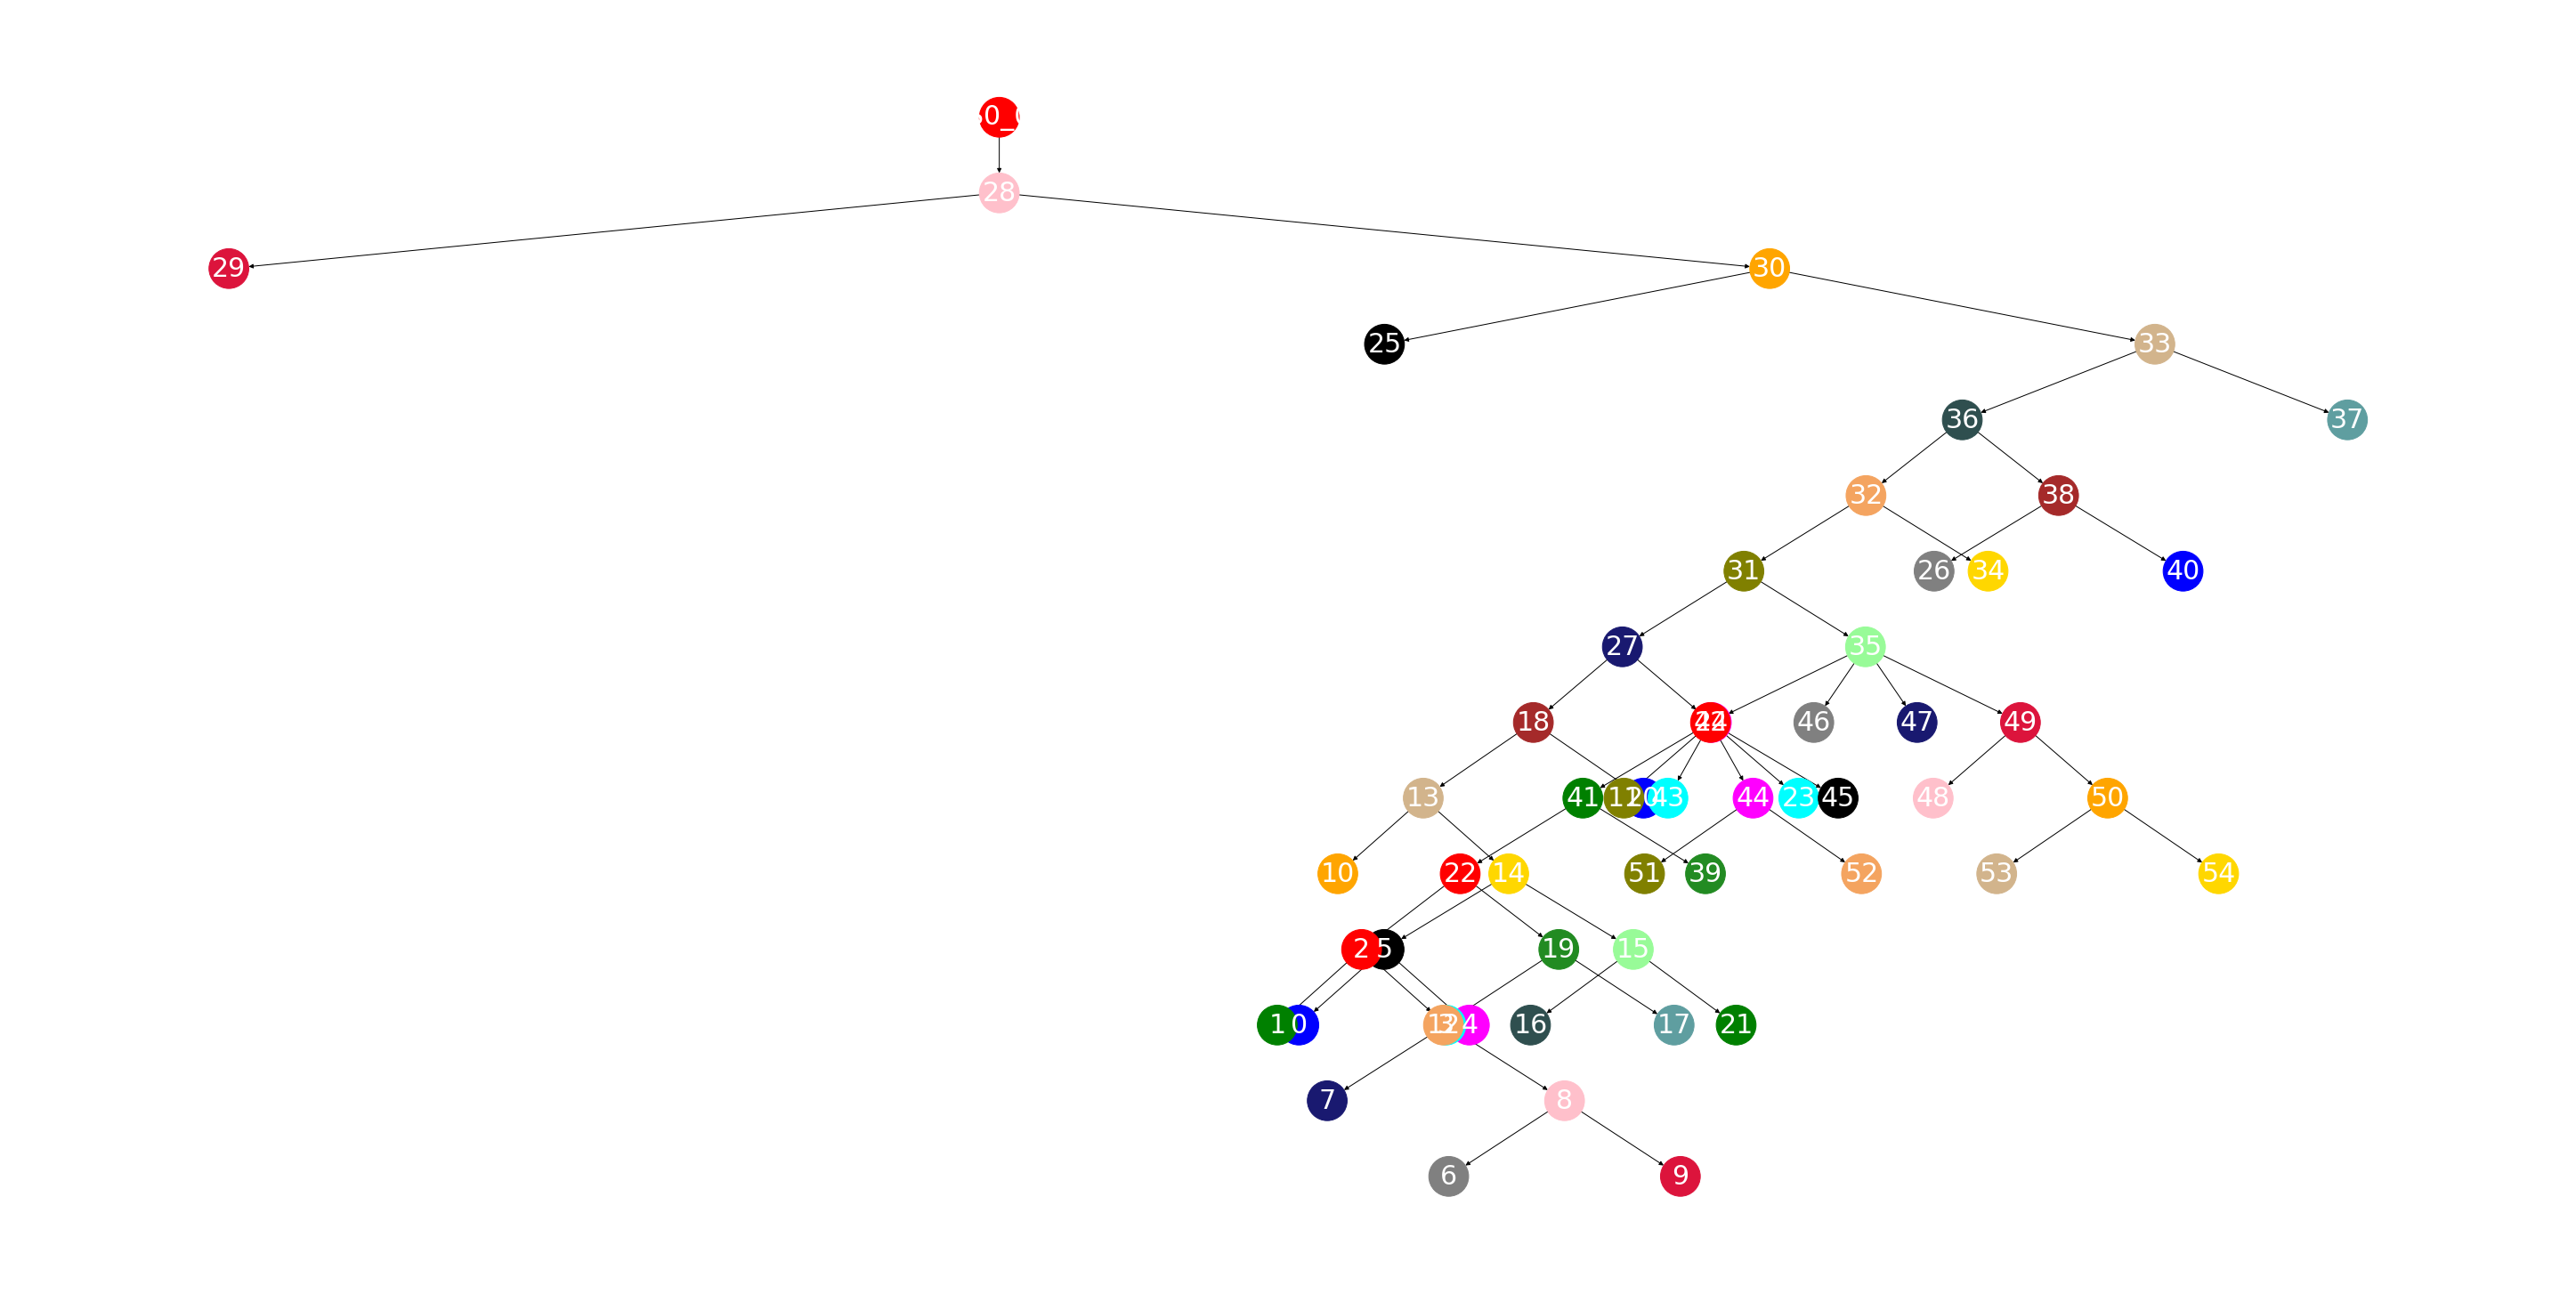

In [70]:
nviz.visualize_neuron_specific_limb(neuron_obj,
                                   6)

{'L6': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54])}

In [79]:
b_idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54])

In [82]:
size_measure = "ray_trace_median"

threshold_size = 120


size_dict = dict()
small_inspect = []
for b_idx in list(neuron_obj.axon_limb_branch_dict.values())[0]:
    b_obj = neuron_obj[neuron_obj.axon_limb_name][b_idx]
    if b_obj.web is not None:
        size_dict[b_idx] = tu.mesh_size(b_obj.web,size_measure)
        if size_dict[b_idx] < threshold_size:
            small_inspect.append(b_idx)
    else:
        size_dict[b_idx] = None

In [83]:
small_inspect

[3, 5, 35, 38, 50]

In [76]:
import trimesh_utils as tu
for m in ["ray_trace_median","volume","bbox_volume_oriented"]:
    m_val = [tu.mesh_size(neuron_obj[6][k].web,m)/1000000 for k in [38,50,44]]
    print(f"m = {m_val}")

m = [0.00010458409845137013, 7.373561033817143e-05, 0.00014765161155520437]
m = [45.14694815998332, 41.71611015498352, 70.58330232000542]
m = [88.51391857100911, 96.21054049020724, 153.40354266495035]


In [87]:
nviz.plot_web_intersection(neuron_obj,
                           limb_idx = 6,
                           branch_idx = small_inspect[3],)

Web Mesh = <trimesh.Trimesh(vertices.shape=(38, 3), faces.shape=(67, 3))>, web_cdf = 0.41901 
web_bbox_rations = [1.8878680561296681, 2.039700721181477, 1.0804254643532039], web_volume_ratio = 1.960573686118274

Parent Node 38, n_boutons = 2
Parent_width (no_bouton_median)= 64.74404677989999
Parent_width (no_spine_median_mesh_center) = 66.48688444655336

Downstream Branch 26, n_boutons = 1

Downstream branch 26 width (no_spine_median_mesh_center) = 60.342227125398026
Downstream branch 26 width (no_bouton_median)= 61.52648380869934
child_angle = 98.63

Downstream Branch 40, n_boutons = 3

Downstream branch 40 width (no_spine_median_mesh_center) = 65.52592513502213
Downstream branch 40 width (no_bouton_median)= 60.149627589544586
child_angle = 50.34

sibling_angles = {40: 132.13}



In [ ]:
"""
Conclusion: Just do the ray trace width for the 
threshold on the webbing:

ray_trace_median < 120

"""

In [88]:
minnie.AutoProofreadValidationBorderNeurons()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),decomposition
864691135735426708,0,0.25,30.00,7,0,=BLOB=
864691135589907979,0,0.25,30.00,7,0,=BLOB=
864691136311791677,0,0.25,30.00,7,0,=BLOB=
864691135699269154,0,0.25,30.00,7,0,=BLOB=
864691135407289801,0,0.25,30.00,7,0,=BLOB=
864691135564655959,0,0.25,30.00,7,0,=BLOB=
864691135382947307,0,0.25,30.00,7,0,=BLOB=
864691135771629819,0,0.25,30.00,7,0,=BLOB=
864691136008425132,0,0.25,30.00,7,0,=BLOB=
864691135865518469,0,0.25,30.00,7,0,=BLOB=


# Developing the filter for the webbing funciton

In [96]:
import error_detection as ed
ed.webbing_t_errors_limb_branch_dict(neuron_obj,
    verbose = True,
    plot_web_errors = True)

two_downstream_thin_axon_limb_branch = {'L6': array([38, 50])}
wide_angled_children= {'L6': array([38, 50])}
Web size = 104.5655571551626
From limb L6, branch 38, Adding the downstream nodes [26, 40]  
Web size = 73.82736405507812
From limb L6, branch 50, Adding the downstream nodes [53, 54]  
Final web t error limb branch dict = {'L6': [26, 40, 53, 54]}

 Working on visualization type: mesh


{'L6': [26, 40, 53, 54]}

# Practice Running the specific Rule 

In [99]:
import proofreading_utils as pru
(filt_neuron,
 return_synapse_df_revised,
return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = pru.v4_exc_filters(),
                        verbose = True,
                        plot_score=False)


--- Working on filter 0:
function = axon_webbing_t_merges
function __name__ = filter_away_webbing_t_merges
function arguments = {'child_width_maximum': 75, 'parent_width_maximum': 75, 'axon_only': True, 'error_if_web_is_none': True, 'web_size_threshold': 120, 'web_size_type': 'ray_trace_median', 'web_above_threshold': True}


limb_branch_dict_to_cancel = {'L6': [26, 40, 53, 54]}


Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 1:
function = axon_webbing_t_merges
function __name__ = filter_away_webbing_t_merges
function arguments = {'child_width_maximum': 75, 'parent_width_maximum': 75, 'axon_only': True, 'error_if_web_is_none': True, 'web_size_threshold': 120, 'web_size_type': 'ray_trace_median', 'web_above_threshold': True}


limb_branch_dict_to_cancel = {}



 ---- Total time for applying filter: 30.35056495666504 -----

--- Finished Part 1: Filtering Neuron -----
Apply the presyn non_error
For presyn: # valid synapses = 29, # error synapses  = 35, # error presyns = 28
For postsyn: # valid synapses = 4641, # error synapses  = 1, # error presyns = 0

--- Finished Part 2: Filtering Synapses -----
Synapsse Results:
Total Number of Synapses = 4706
n_valid_syn_ids_presyn = 29
n_errored_syn_ids_presyn = 35
n_valid_syn_ids_postsyn = 4641
n_errored_syn_ids_postsyn = 1

--- Finished Part 3: Generating Validation Dataframe -----


Segment Id = 864691136201041854
Postsyn counts:
TP:4637
TN:0
FP:4
FN:1
Presyn counts:
TP:5
TN:7
FP:24
FN:0


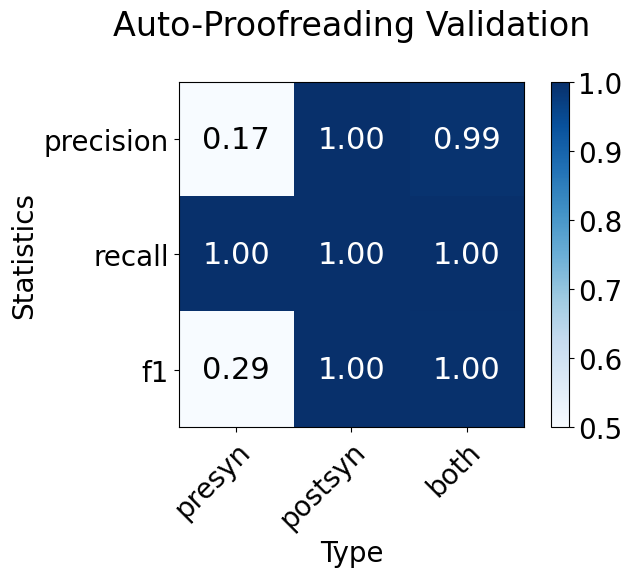

In [100]:
vu.synapse_validation_df_to_score_plot(return_validation_df_revised)

In [101]:
vu.plot_validation_synapses(segment_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange


# Run the Filtering Using the Overall Rules

In [105]:
(base_filt_neuron,
 return_synapse_df,
return_validation_df) =  vu.filtered_neuron_score(neuron_obj = neuron_obj_axon,   
                        filter_list = (pru.get_exc_filters_high_fidelity_axon_postprocessing()
                                       + pru.v4_exc_filters()),
                        verbose = True,
                                                 plot_score=False)


--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 1:
function = crossovers
function __name__ = filter_away_crossovers
function arguments = {'axon_dependent': True, 'match_threshold': 50, 'require_two_pairs': False}


limb_branch_dict_to_cancel = {'L6': [42, 45, 46, 47, 1, 2, 3, 6, 39, 8, 41, 7, 9, 12, 17, 19, 22, 51, 43, 44, 52]}


Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 2:
function = double_back_and_width_change
function __name__ = filter_away_large_double_back_or_width_changes
function arguments = {'perform_double_back_errors': True, 'skip_double_back_errors_for_axon': False, 'width_jump_threshold': 250, 'running_width_jump_method': True, 'double_back_axon_like_threshold': 145, 'double_back_threshold': 120}


limb_branch_dict_to_cancel = {'L6': [27, 28, 15, 1]}


Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 3:
function = high_degree_coordinates
function __name__ = filter_away_high_degree_coordinates
function arguments = {'axon_dependent': True, 'min_degree_to_find': 4}


min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
min_degree_to_find = 4
limb_branch_dict_to_cancel = {}

--- Working on filter 4:
function = axon_webbing_t_merges
function __name__ = filter_away_webbing_t_merges
function arguments = {'child_width_maximum': 75, 'parent_width_maximum': 75, 'axon_only': True, 'error_if_web_is_none': True, 'web_size_threshold': 120, 'web_size_type': 'ray_trace_median', 'web_above_threshold': True}


limb_branch_dict_to_cancel = {'L6': [28, 29]}


Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 5:
function = axon_webbing_t_merges
function __name__ = filter_away_webbing_t_merges
function arguments = {'child_width_maximum': 75, 'parent_width_maximum': 75, 'axon_only': True, 'error_if_web_is_none': True, 'web_size_threshold': 120, 'web_size_type': 'ray_trace_median', 'web_above_threshold': True}


limb_branch_dict_to_cancel = {}



 ---- Total time for applying filter: 130.7803249359131 -----

--- Finished Part 1: Filtering Neuron -----
Apply the presyn non_error
For presyn: # valid synapses = 5, # error synapses  = 59, # error presyns = 22
For postsyn: # valid synapses = 4632, # error synapses  = 10, # error presyns = 0

--- Finished Part 2: Filtering Synapses -----
Synapsse Results:
Total Number of Synapses = 4706
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 59
n_valid_syn_ids_postsyn = 4632
n_errored_syn_ids_postsyn = 10

--- Finished Part 3: Generating Validation Dataframe -----


Segment Id = 864691136201041854
Postsyn counts:
TP:4630
TN:2
FP:2
FN:8
Presyn counts:
TP:5
TN:37
FP:0
FN:0


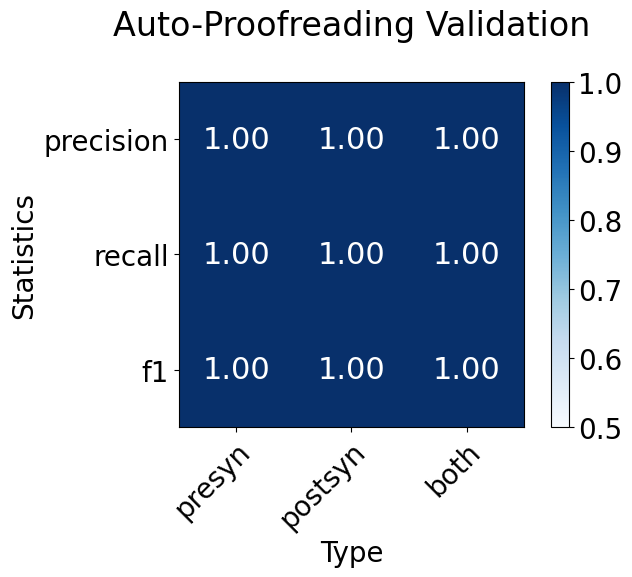

In [106]:
vu.synapse_validation_df_to_score_plot(return_validation_df)

In [107]:
vu.plot_validation_synapses(segment_id,
                            validation_df = return_validation_df,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = base_filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange
